<h1>Project 15</h1>


<h2>Customer Churn Analysis</h2>


<img src="https://cdn.pixabay.com/photo/2016/03/29/08/48/project-1287781_1280.jpg">

***First importing necessary packages***

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

***Importing data which is in csv format***

In [2]:
df=pd.read_csv('Customer Churn Analysis.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h2>Start of EDA process</h2>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

We see that there are missing values

In [5]:
df.drop(['customerID'],axis=1,inplace=True)

In [6]:
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [7]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Male      3555
Female    3488
Name: gender, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


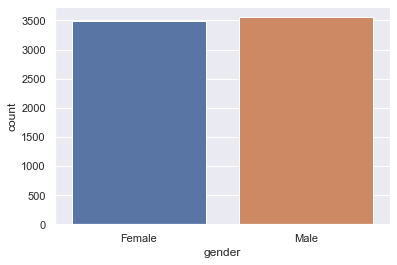

No     3641
Yes    3402
Name: Partner, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


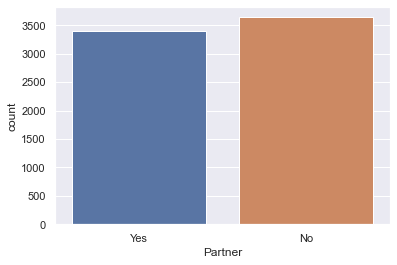

No     4933
Yes    2110
Name: Dependents, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


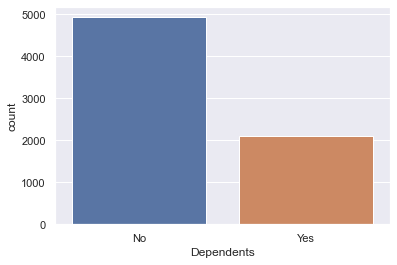

Yes    6361
No      682
Name: PhoneService, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


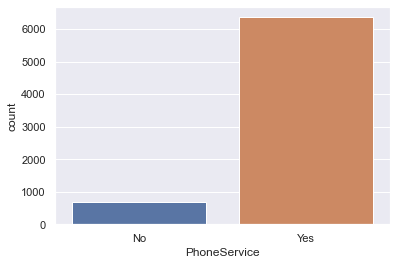

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


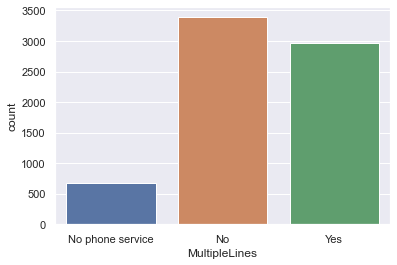

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


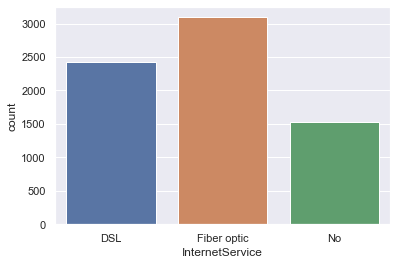

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


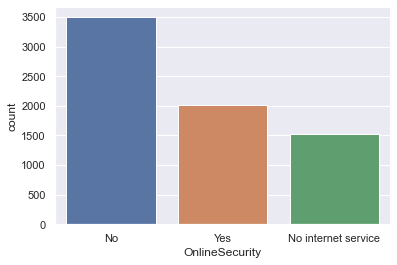

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


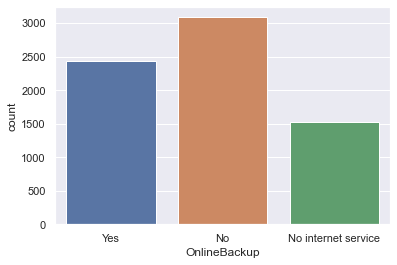

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


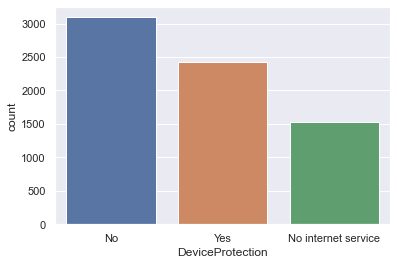

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


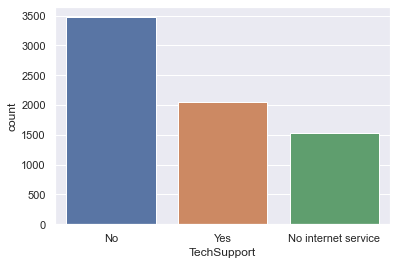

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


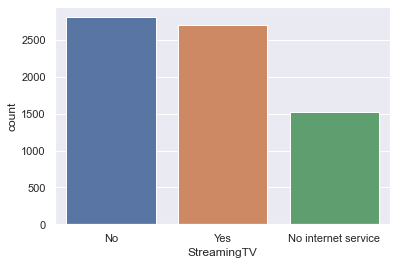

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


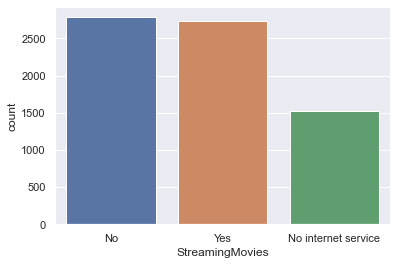

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


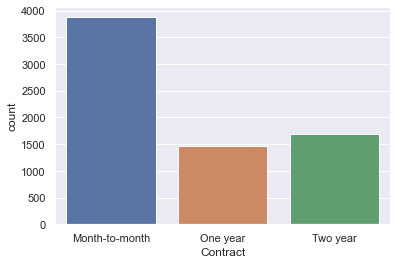

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


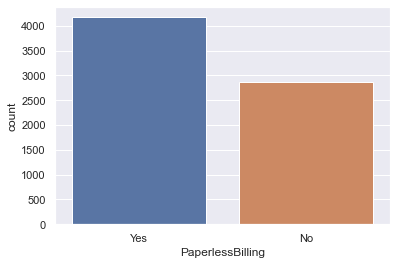

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


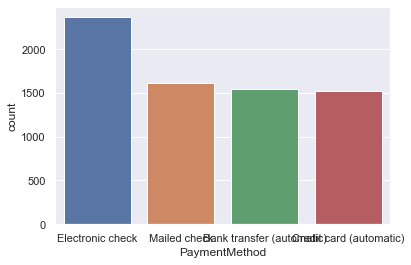

No     5174
Yes    1869
Name: Churn, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


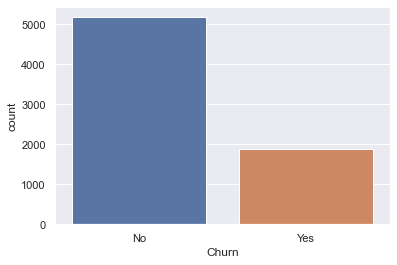

In [8]:
for i in df.columns:
    if df[i].dtype=="object":
        print(df[i].value_counts())
        print()
        print(sns.countplot(df[i]))
        plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


We can see that there are multiple null values in TotalCharges column 

In [10]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

***Lets replace null value with mean of that column***

In [11]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [12]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

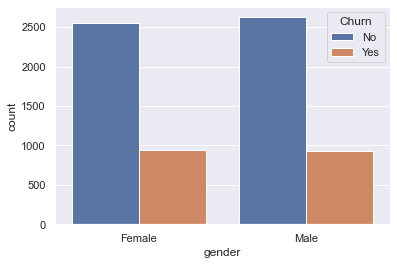

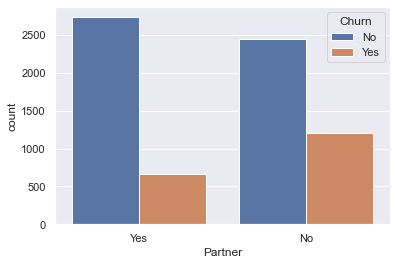

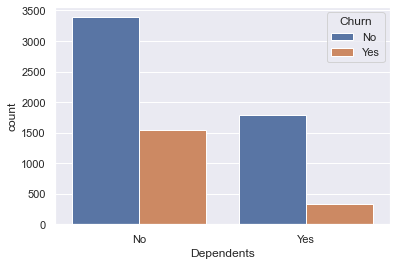

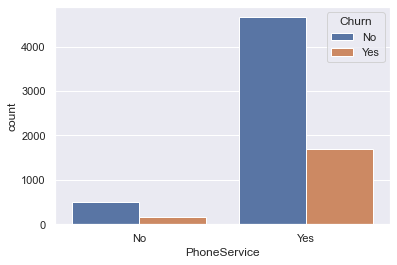

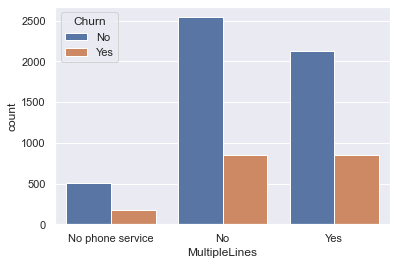

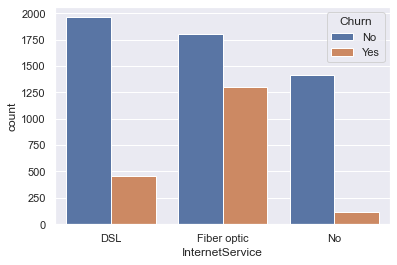

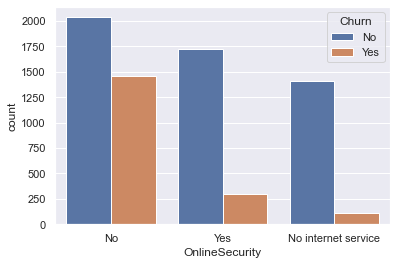

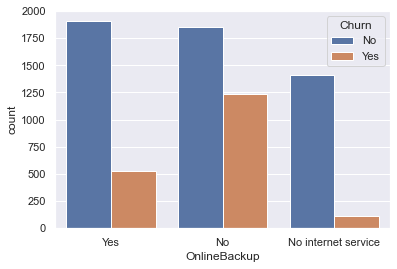

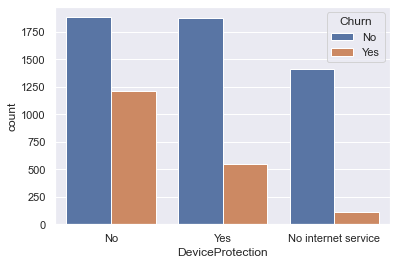

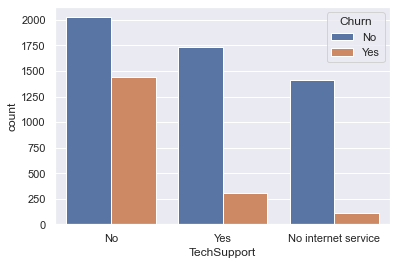

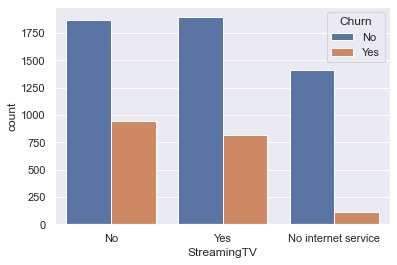

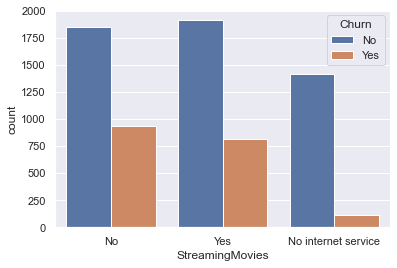

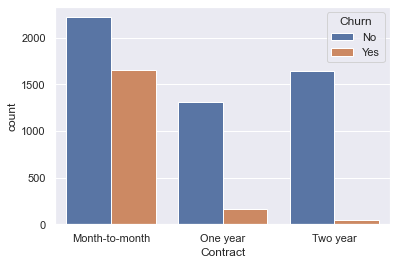

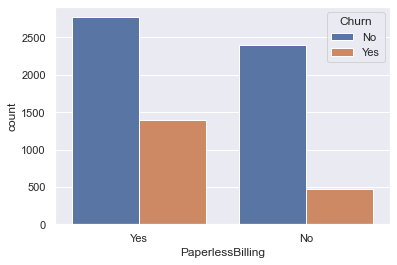

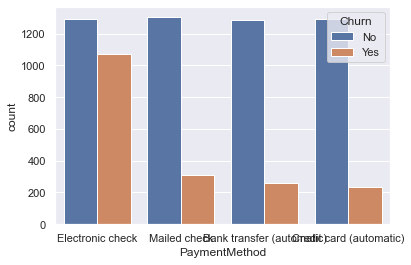

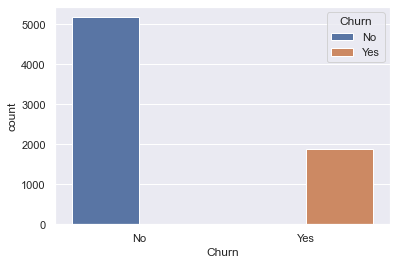

In [13]:
for i in df.columns:
    if df[i].dtype=="object":
        sns.countplot(x=df[i],hue="Churn",data=df)
        plt.show()

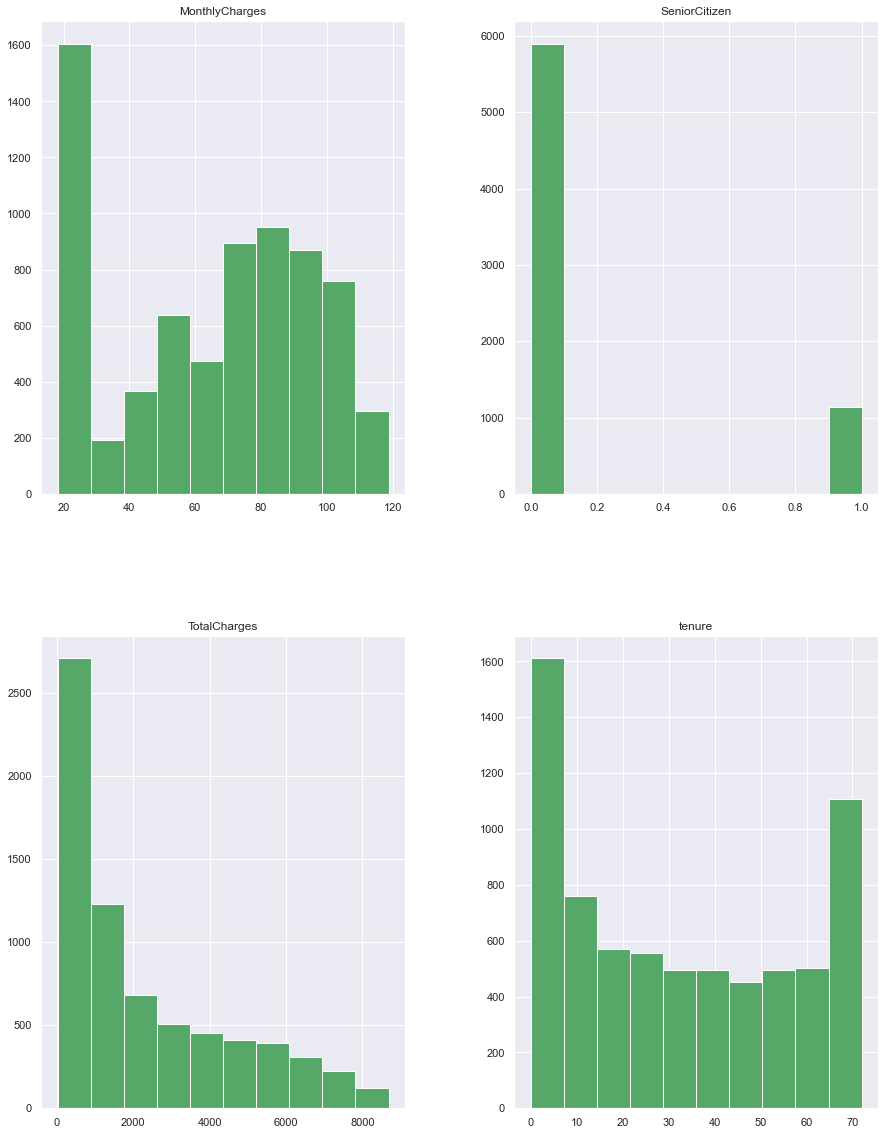

In [14]:
df.hist(figsize=(15,20),color='g')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()

In [16]:
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [17]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


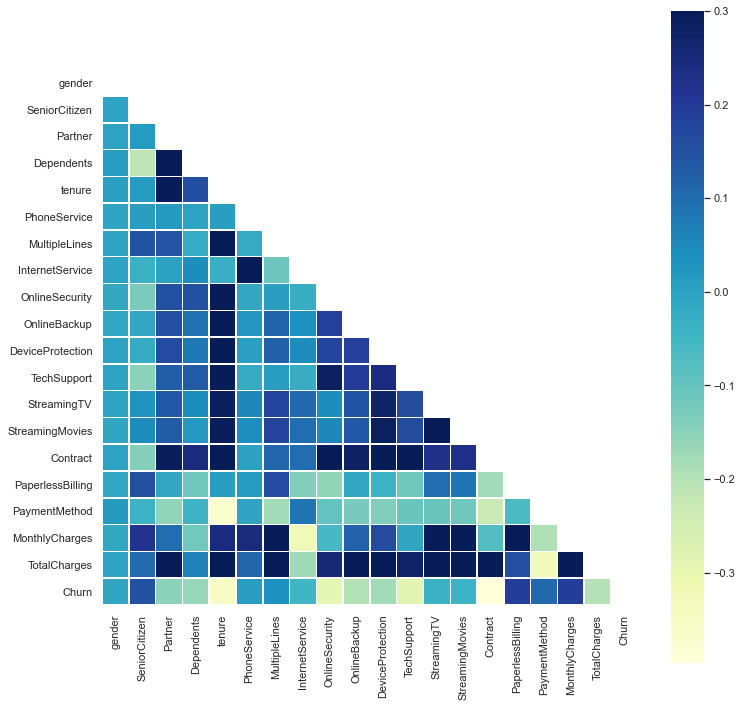

In [18]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=0.5,cmap="YlGnBu")

In [19]:
y=df[['Churn']]
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [20]:
x=df.drop(['Churn'],axis=1)
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [21]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

We have both of input and output attributes cleaned and in desired format

<h2>End of EDA Process</h2>

Lets start Building models to make predictions and find the model that works best on our dataset

<h2>Start of Machine Learning Process</h2>

Since out target variable is Bivariant, we are going to do classification analysis

***Lets import required packages***

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [23]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=56)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=200,random_state=56)
GBC=GradientBoostingClassifier(n_estimators=200,random_state=56)
ABC=AdaBoostClassifier(random_state=56)
ETC=ExtraTreesClassifier(random_state=56)

In [24]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

***Lets split our data randomly and see which model works better***

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

***Lets create a loop that will execute all our models***

*-----------------------------* KNeighborsClassifier *------------------------------*


KNeighborsClassifier()


Accuracy_score =  0.7579843860894251


Cross_Val_Score =  0.7546423678272083


roc_auc_score =  0.6767211485710144


classification_report
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1036
           1       0.55      0.50      0.52       373

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.75      1409



[[880 156]
 [185 188]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


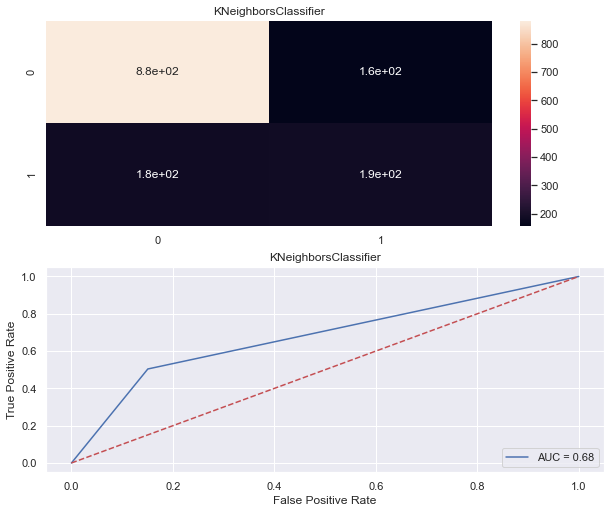




*-----------------------------* SVC *------------------------------*


SVC()


Accuracy_score =  0.8069552874378992


Cross_Val_Score =  0.7985243391360413


roc_auc_score =  0.7091644497810718


classification_report
               precision    recall  f1-score   support

           0       0.84      0.92      0.87      1036
           1       0.68      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



[[950  86]
 [186 187]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


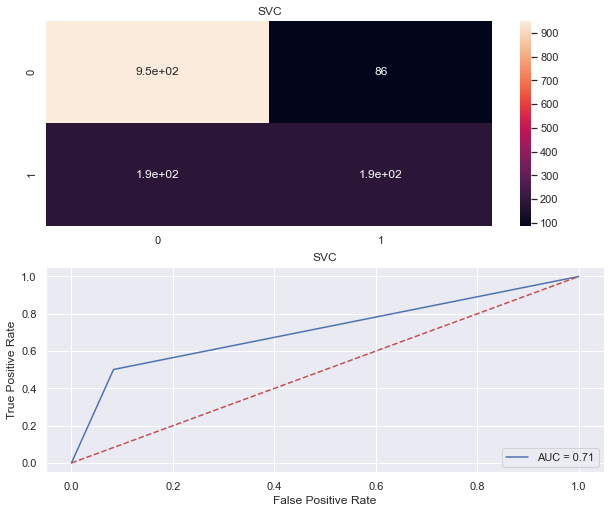




*-----------------------------* LogisticRegression *------------------------------*


LogisticRegression()


Accuracy_score =  0.8161816891412349


Cross_Val_Score =  0.802783284977434


roc_auc_score =  0.741174293788235


classification_report
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



[[933 103]
 [156 217]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


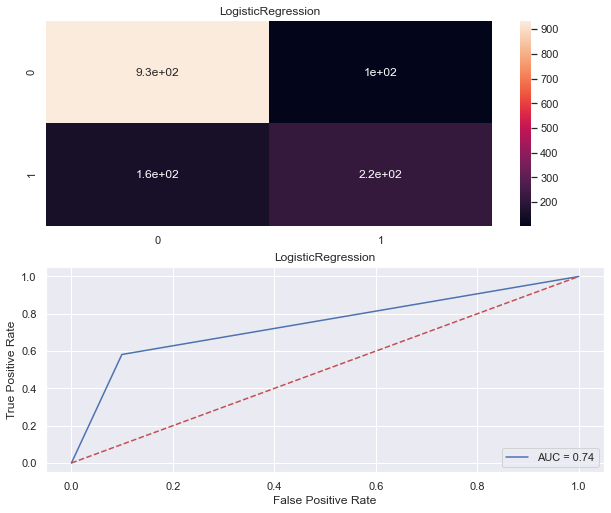




*-----------------------------* DecisionTreeClassifier *------------------------------*


DecisionTreeClassifier(random_state=56)


Accuracy_score =  0.7317246273953159


Cross_Val_Score =  0.7296637250161186


roc_auc_score =  0.664011148260478


classification_report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1036
           1       0.49      0.52      0.51       373

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.73      0.73      1409



[[837 199]
 [179 194]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


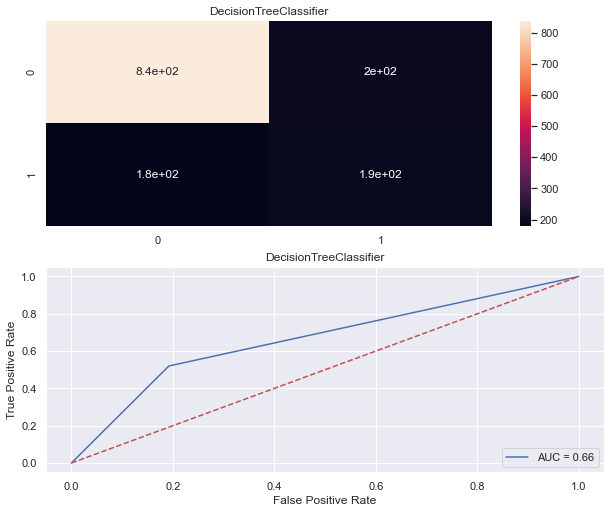




*-----------------------------* GaussianNB *------------------------------*


GaussianNB()


Accuracy_score =  0.7579843860894251


Cross_Val_Score =  0.7513843891038039


roc_auc_score =  0.7633647147722213


classification_report
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



[[779 257]
 [ 84 289]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


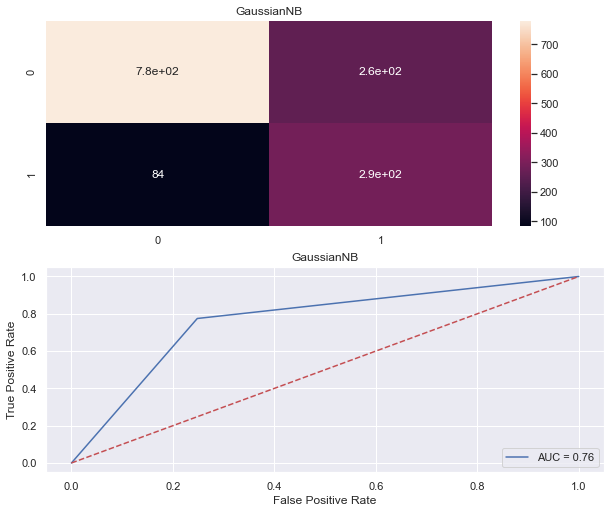




*-----------------------------* RandomForestClassifier *------------------------------*


RandomForestClassifier(n_estimators=200, random_state=56)


Accuracy_score =  0.7927608232789212


Cross_Val_Score =  0.7952548758865248


roc_auc_score =  0.6935069404908547


classification_report
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



[[937  99]
 [193 180]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


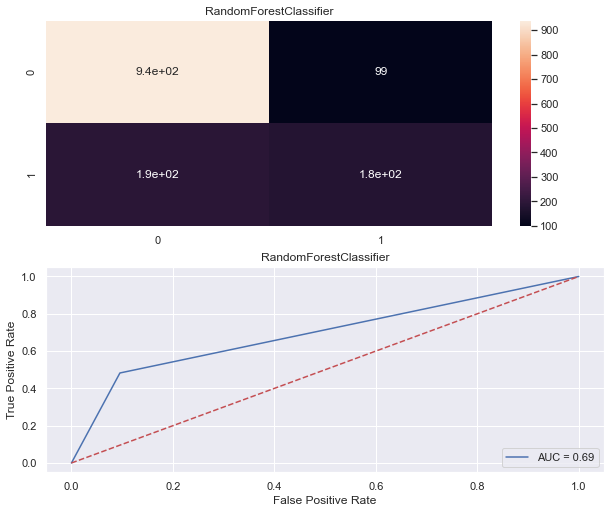




*-----------------------------* GradientBoostingClassifier *------------------------------*


GradientBoostingClassifier(n_estimators=200, random_state=56)


Accuracy_score =  0.8026969481902059


Cross_Val_Score =  0.8009362911025146


roc_auc_score =  0.7131315536141274


classification_report
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



[[936 100]
 [178 195]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


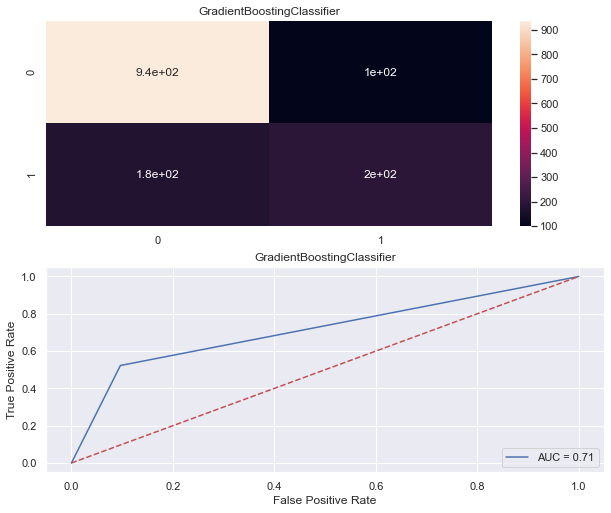




*-----------------------------* ExtraTreesClassifier *------------------------------*


ExtraTreesClassifier(random_state=56)


Accuracy_score =  0.7877927608232789


Cross_Val_Score =  0.7804861782720826


roc_auc_score =  0.6849814195658699


classification_report
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409



[[936 100]
 [199 174]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


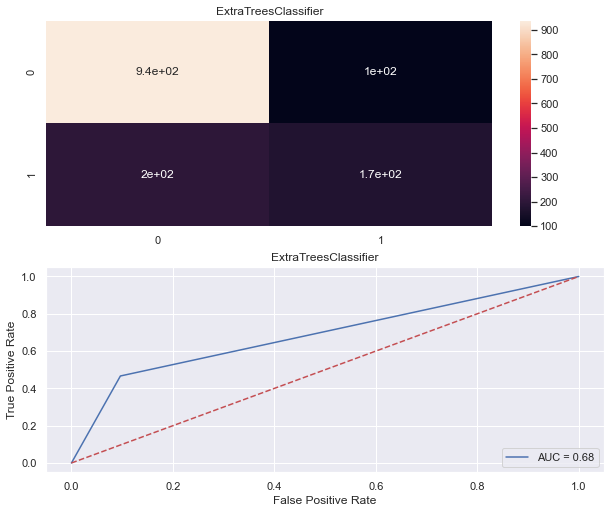




*-----------------------------* AdaBoostClassifier *------------------------------*


AdaBoostClassifier(random_state=56)


Accuracy_score =  0.8034066713981547


Cross_Val_Score =  0.8022132898130238


roc_auc_score =  0.715329893278955


classification_report
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



[[935 101]
 [176 197]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


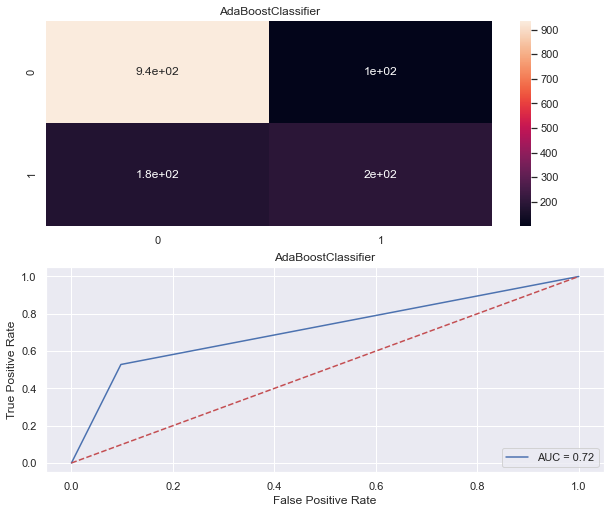

In [26]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print('\n\n')

In [27]:
Final_R = pd.DataFrame({'Classification Model': Model, 'Accuracy Score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
Final_R

,Classification Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,75.798439,75.464237,67.672115
1,SVC,80.695529,79.852434,70.916445
2,LogisticRegression,81.618169,80.278328,74.117429
3,DecisionTreeClassifier,73.172463,72.966373,66.401115
4,GaussianNB,75.798439,75.138439,76.336471
5,RandomForestClassifier,79.276082,79.525488,69.350694
6,GradientBoostingClassifier,80.269695,80.093629,71.313155
7,ExtraTreesClassifier,78.779276,78.048618,68.498142
8,AdaBoostClassifier,80.340667,80.221329,71.532989


Logistic Regression seems to be working better with better Cross_val_score and Roc_auc_curve, so lets try to make this better and see if we can increase its accuracy more

***Lets first find best random state for Logistic Regression to split our data into train and test data***

In [28]:
max_accuracy=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        final_r_state=r_state
print("Maximum Accuracy is achived for random state ",final_r_state," with a score of",max_accuracy)

Maximum Accuracy is achived for random state  92  with a score of 0.8246983676366217


***Lets split our dataset based on above random state***

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=92)

***Lets find best hyperparameters for Logistic Regression using grid search***

In [30]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
lr=LogisticRegression()
lr_cv=GridSearchCV(lr,grid,cv=10)
lr_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",lr_cv.best_params_)
print("accuracy :",lr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.7990747389239509


              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1041
           1       0.72      0.56      0.63       368

    accuracy                           0.83      1409
   macro avg       0.79      0.74      0.76      1409
weighted avg       0.82      0.83      0.82      1409



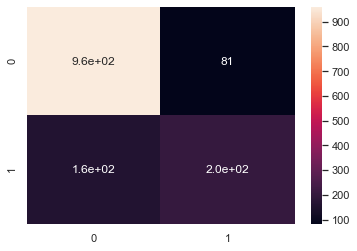

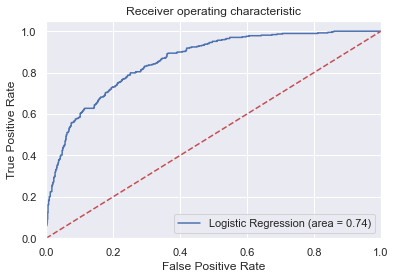

Accuracy of the model is 82.68275372604684


In [31]:
lr_f=LogisticRegression(penalty='l2',C=0.1)
lr_f.fit(x_train,y_train)
pre=lr_f.predict(x_test)
accuracy=accuracy_score(y_test,pre)
cm=sns.heatmap(confusion_matrix(y_test,pre),annot=True)
print(classification_report(y_test, pre))
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc = roc_auc_score(y_test, pre)
fpr, tpr, thresholds = roc_curve(y_test, lr_f.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('Accuracy of the model is',accuracy*100)

<h2>End of Machine learning Process</h2>


<h1>Now lets save our final model</h1>

In [32]:
import joblib
joblib.dump(lr_f,'Customer_Churn_Analysis.pkl')

['Customer_Churn_Analysis.pkl']

<img src="https://knowledge.wharton.upenn.edu/wp-content/uploads/2020/05/Women-in-data-science.jpg">
